<a href="https://colab.research.google.com/github/mashdas/Deep_Learning_101/blob/master/heaton_bc_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd

df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/wcbreast_wdbc.csv",
    na_values=['NA','?'])

pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 5)

display(df)


,id,diagnosis,mean_radius,...,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,842302,M,17.99,...,0.2654,0.4601,0.11890
1,842517,M,20.57,...,0.1860,0.2750,0.08902
...,...,...,...,...,...,...,...
567,927241,M,20.60,...,0.2650,0.4087,0.12400
568,92751,B,7.76,...,0.0000,0.2871,0.07039


In [0]:
# %matplotlib inline
# import matplotlib.pyplot as plt
# import numpy as np
# import scipy.stats as stats
# import math

# mu1 = -2
# mu2 = 2
# variance = 1
# sigma = math.sqrt(variance)
# x1 = np.linspace(mu1 - 5*sigma, mu1 + 4*sigma, 100)
# x2 = np.linspace(mu2 - 5*sigma, mu2 + 4*sigma, 100)
# plt.plot(x1, stats.norm.pdf(x1, mu1, sigma)/1,color="green")
# plt.plot(x2, stats.norm.pdf(x2, mu2, sigma)/1,color="red")
# plt.axvline(x=-2,color="black")
# plt.axvline(x=0,color="black")
# plt.axvline(x=+2,color="black")
# plt.text(-2.7,0.55,"Sensitive")
# plt.text(-0.7,0.55,"Balanced")
# plt.text(1.7,0.55,"Specific")
# plt.ylim([0,0.53])
# plt.xlim([-5,5])
# plt.legend(['Negative','Positive'])
# plt.yticks([])
# #plt.set_yticklabels([])
# plt.show()

In [0]:

from scipy.stats import zscore

# Prepare data - apply z-score to ALL x columns
# Only do this if you have no categoricals (and are sure you 
# want to use z-score across the board)
x_columns = df.columns.drop('diagnosis').drop('id')
for col in x_columns:
    df[col] = zscore(df[col])

# Convert to numpy - Regression
x = df[x_columns].values
y = df['diagnosis'].map({'M':1,"B":0}).values # Binary classification, 
                                              # M is 1 and B is 0

In [0]:
# %matplotlib inline
# import matplotlib.pyplot as plt
# from sklearn.metrics import roc_curve, auc

# # Plot a confusion matrix.
# # cm is the confusion matrix, names are the names of the classes.
# def plot_confusion_matrix(cm, names, title='Confusion matrix', 
#                             cmap=plt.cm.Blues):
#     plt.imshow(cm, interpolation='nearest', cmap=cmap)
#     plt.title(title)
#     plt.colorbar()
#     tick_marks = np.arange(len(names))
#     plt.xticks(tick_marks, names, rotation=45)
#     plt.yticks(tick_marks, names)
#     plt.tight_layout()
#     plt.ylabel('True label')
#     plt.xlabel('Predicted label')
    

# # Plot an ROC. pred - the predictions, y - the expected output.
# def plot_roc(pred,y):
#     fpr, tpr, _ = roc_curve(y, pred)
#     roc_auc = auc(fpr, tpr)

#     plt.figure()
#     plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
#     plt.plot([0, 1], [0, 1], 'k--')
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('Receiver Operating Characteristic (ROC)')
#     plt.legend(loc="lower right")
#     plt.show()

In [13]:
# Classification neural network
import numpy as np
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.25, random_state=42)

model = Sequential()
model.add(Dense(100, input_dim=x.shape[1], activation='relu',
                kernel_initializer='random_normal'))
model.add(Dense(50,activation='relu',kernel_initializer='random_normal'))
model.add(Dense(25,activation='relu',kernel_initializer='random_normal'))
model.add(Dense(1,activation='sigmoid',kernel_initializer='random_normal'))
model.compile(loss='binary_crossentropy', 
              optimizer=tensorflow.keras.optimizers.Adam(),
              metrics =['accuracy'])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
    patience=5, verbose=1, mode='auto', restore_best_weights=True)

history=model.fit(x_train,y_train,validation_data=(x_test,y_test),
          callbacks=[monitor],verbose=2,epochs=1000)


Epoch 1/1000
14/14 - 0s - loss: 0.6851 - accuracy: 0.8732 - val_loss: 0.6666 - val_accuracy: 0.9650
Epoch 2/1000
14/14 - 0s - loss: 0.6268 - accuracy: 0.9249 - val_loss: 0.5476 - val_accuracy: 0.9510
Epoch 3/1000
14/14 - 0s - loss: 0.4580 - accuracy: 0.9343 - val_loss: 0.2996 - val_accuracy: 0.9580
Epoch 4/1000
14/14 - 0s - loss: 0.2211 - accuracy: 0.9601 - val_loss: 0.1171 - val_accuracy: 0.9720
Epoch 5/1000
14/14 - 0s - loss: 0.1066 - accuracy: 0.9695 - val_loss: 0.0665 - val_accuracy: 0.9790
Epoch 6/1000
14/14 - 0s - loss: 0.0848 - accuracy: 0.9765 - val_loss: 0.0559 - val_accuracy: 0.9790
Epoch 7/1000
14/14 - 0s - loss: 0.0755 - accuracy: 0.9789 - val_loss: 0.0521 - val_accuracy: 0.9860
Epoch 8/1000
14/14 - 0s - loss: 0.0731 - accuracy: 0.9789 - val_loss: 0.0490 - val_accuracy: 0.9930
Epoch 9/1000
14/14 - 0s - loss: 0.0608 - accuracy: 0.9859 - val_loss: 0.0486 - val_accuracy: 0.9860
Epoch 10/1000
14/14 - 0s - loss: 0.0545 - accuracy: 0.9836 - val_loss: 0.0478 - val_accuracy: 0.9860

In [0]:
df

In [0]:

def plot_lc(history,epochs):
  ##Accuracy
  epoch_range=range(1,epochs+1)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title("Model_accuracy")
  plt.ylabel("Accuracy")
  plt.xlabel("Epoch")
  plt.show()


   ##Loss
  epoch_range=range(1,epochs+1)
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title("Model_loss")
  plt.ylabel("Loss")
  plt.xlabel("Epoch")

  plt.legend(["Train","Val"],loc="upper left")
  plt.show()

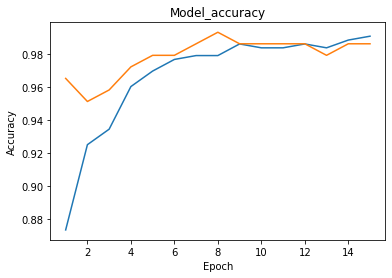

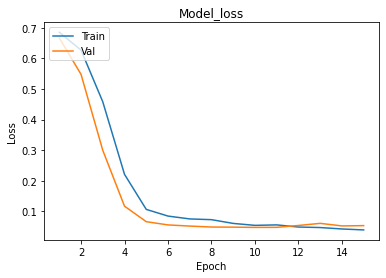

In [14]:
plot_lc(history,15)